In [1]:
import numpy as np

import random

import cmath

import math

from matplotlib import pyplot as plt

import time


In [2]:
rough = list()

for _ in range(30):
    
    rough.append(random.randint(0,10))
        
print(rough)

[2, 3, 4, 3, 2, 1, 4, 5, 0, 8, 5, 3, 4, 1, 9, 2, 4, 8, 10, 6, 7, 3, 5, 9, 0, 9, 1, 6, 0, 3]


# myDFT

In [3]:
def myDFT(x):
    
    N = len(x)
    
    X = list()
    
    for k in range(N):
        
        val = complex(0,0)
        
        for n in range(N):
            
            c = -2*k*n*cmath.pi/N
            
            val += x[n] * cmath.exp(complex(0,c))
            
        X.append(val)
        
    return X
            


# myDCT

In [4]:
def myDCT(x):
    
    N = len(x)
    
    X = list()
    
    for n in range(N):
        
        val = 0
        
        for k in range(N):
            
            val+=x[k]*np.cos((np.pi*(2*k+1)*n)/(2*N))
            
        X.append(val)
        
    return X

# Reduced DFT and DCT

In [5]:
def reducedDFT(x,n):
    
    N = len(x)
    
    X = myDFT(x)
    
    lst = list(zip(range(N),X))
    
    lst.sort(key=lambda x: np.absolute(x[1]),reverse=True)
    
    return lst[0:len(x)//n]

reducedDFT(rough,2)


[(0, (127+0j)),
 (1, (-21.696991894593296+16.008450846228108j)),
 (29, (-21.696991894592944-16.00845084622829j)),
 (17, (18.687868290413416-18.128873689945095j)),
 (13, (18.687868290413416+18.12887368994508j)),
 (14, (-21.63732294536728+9.973459083997856j)),
 (16, (-21.637322945367213-9.97345908399799j)),
 (11, (-4.35467088602965-21.873791633407002j)),
 (19, (-4.354670886029576+21.873791633406935j)),
 (23, (-1.1362055097906316+17.039972999280543j)),
 (7, (-1.1362055097905461-17.03997299928045j)),
 (12, (5.781152949374507+14.437361169581212j)),
 (18, (5.78115294937445-14.437361169581061j)),
 (4, (-3.997931970257022-13.896198011196399j)),
 (26, (-3.9979319702570466+13.896198011196363j))]

In [6]:
def reducedDCT(x,n):
    
    N = len(x)
    
    X = myDCT(x)
    
    lst = list(zip(range(N),X))
    
    lst.sort(key=lambda x: np.absolute(x[1]),reverse=True)
    
    return lst[0:len(x)//n]

reducedDCT(rough,2)


[(0, 127.0),
 (27, -28.369487750091864),
 (22, -21.75390720600319),
 (26, 21.618140597865494),
 (2, -19.904794736548986),
 (24, 15.517220926874428),
 (15, -14.849242404917447),
 (3, 14.202998058018744),
 (1, -12.828476387732195),
 (14, -12.246332710626902),
 (7, 10.75694960709954),
 (8, -9.304385521983068),
 (16, 8.239783378891829),
 (11, -8.002661777784644),
 (28, 7.657107314890446)]

# IDFT

In [7]:
def IDFT(X):
    
    N = len(X)
    
    x = list()
    
    for i in range(N):
        
        val = 0
        
        for k in range(N):
            
            val += X[k]*np.exp(2*np.pi*i*k*1j/N)
            
        x.append(np.real(val/len(X)))
    
    return x

estimated_rough = IDFT(myDFT(rough))

# Checking correctness of IDFT

In [8]:
count = 0

for i in range(len(rough)):
    
    val = int(estimated_rough[i] + 0.5)
    
    if val != rough[i]:
        
        count += 1
        
print(count)

0


`since all the values from estimated_rough matches with the corresponding values of rough, count is 0`

# IDCT

In [9]:
def IDCT(X):
    
    x = list()
    N = len(X)
    
    for n in range(N):
        
        val=0
        
        for k in range(N):
            
            if k==0:
                
                val+=0.5*X[k]
                
            else:
                
                val+=X[k]*np.cos(np.pi*(2*n+1)*k/(2*N))
                
        x.append(val*2/N)
        
    return x

est_rough = IDCT(myDCT(rough))

# Correctness  of IDCT

In [10]:
count = 0

for i in range(len(rough)):
    
    val = int(est_rough[i] + 0.5)
    
    if val != rough[i]:
        
        count += 1
        
print(count)

0


`since all the values from est_rough matches with the corresponding values of rough, count is 0`

# Reduced x calculation from reduced X

In [11]:
def x_from_reduced_DFT(x,n):
    
    X_reduced = reducedDFT(x,n)
    
    X = [0 for i in range(len(x))]
    
    for value in X_reduced:
        
        X[value[0]] = value[1]
    
    ans = IDFT(X)
    
    return ans

In [12]:
def x_from_reduced_DCT(x,n):
    
    X_reduced = reducedDCT(x,n)
    
    X = [0 for i in range(len(x))]
    
    for value in X_reduced:
        
        X[value[0]] = value[1]
        
    ans = IDCT(X)
    
    return ans

In [13]:
def MSE(r1,r2):
    
    return np.square(r1-r2).mean()

In [14]:
np.random.seed(0)

N = 128

dft_data = list()

dct_data = list()

x = np.random.randn(128) #creating random sequence of length 128

for i in range(8,0,-1):
    
    reduced_x_DFT  = x_from_reduced_DFT(x,2**i)
    
    dft_data.append(MSE(x,reduced_x_DFT))
    
    reduced_x_DCT = x_from_reduced_DCT(x,2**i)
    
    dct_data.append(MSE(x,reduced_x_DCT))


In [15]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


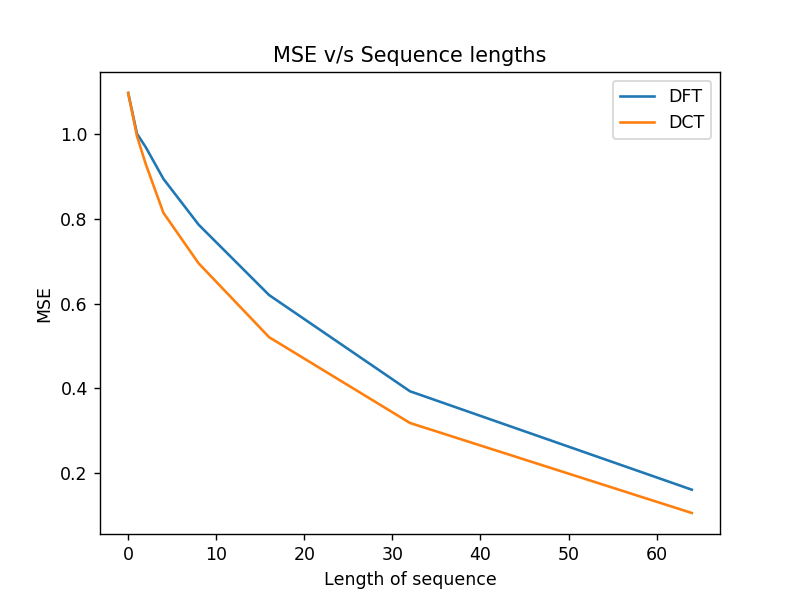

In [17]:
plt.figure()

x_values = [N//2**i for i in range(8,0,-1)]

plt.plot(x_values,dft_data,label="DFT")
plt.plot(x_values,dct_data,label = "DCT")
plt.xlabel('Length of sequence')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE v/s Sequence lengths')

plt.show()